In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
! pip install tflearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 826.2 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=e60705d06d4eca21bb2c5b1073ccf19d60ceedb02e6d0f3553976bc5af935f6f
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [3]:
from os import terminal_size
import imgaug.augmenters as augment
import cv2
import numpy as np
import pandas as pd
import os
from random import shuffle
from tqdm import tqdm
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from tensorflow.keras import Sequential
from keras.models import Model,load_model
import tensorflow.keras.layers
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, MaxPool2D 

In [4]:
IMG_SIZE = 224
counter=0
train_data = []
test_data=[]
counter_train=0
counter_test=0
def getLabel(imageName):
 
    if imageName.find('Basketball')!=-1:
        return [1,0,0,0,0,0]
    elif imageName.find('Football')!=-1:
        return  [0, 1, 0, 0, 0,0]
    elif imageName.find('Rowing')!=-1:
        return  [0, 0, 1, 0, 0,0]
    elif imageName.find('Swimming')!=-1:
        return  [0, 0, 0, 1, 0,0]
    elif imageName.find('Tennis')!=-1:
        return  [0, 0, 0, 0, 1,0]
    elif imageName.find('Yoga')!=-1:
        return  [0, 0, 0, 0, 0,1]

In [5]:
def getAugmentation(image):
    hflip = augment.Fliplr(p=1.0)
    image_hf = hflip.augment_image(image)

    vflip = augment.Flipud(p=1.0)
    image_vf = vflip.augment_image(image)

    rot1 = augment.Affine(rotate=(-50, 20))
    image_rot1 = rot1.augment_image(image)

    rot2 = augment.Affine(rotate=(20, -50))
    image_rot2 = rot1.augment_image(image)

    crop1 = augment.Crop(percent=(0, 0.3))
    image_crop1 = crop1.augment_image(image)

    shear = augment.Affine(shear=(-40, 40))
    image_shear = shear.augment_image(image)

    return [image,image_hf,image_vf,image_rot1,image_crop1,image_shear,image_rot2]

In [6]:
def getTrainData():
 
    for image in tqdm(os.listdir('/kaggle/input/nn23-sports-image-classification/Train')):
        path = os.path.join('/kaggle/input/nn23-sports-image-classification/Train', image)
        img_data = cv2.imread(path)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        label=getLabel(image)
        images_list=getAugmentation(img_data)
        for i in images_list:
            train_data.append([i,label])

 
    shuffle(train_data)
 
    np.save('train_data_p.npy', train_data)
    #print(list[0],'\n ',list[1],'\n',list[2],'\n',list[3],'\n',list[4],'\n',list[5],'\n')
    return train_data

In [7]:
IMG_SIZE=224
if (os.path.exists('/kaggle/working/train_data_p.npy')):
    train_data =np.load('train_data_p.npy',allow_pickle=True)
else:
    train_data = getTrainData()
x_train= np.array([i[0] for i in train_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
y_train= np.array([i[1] for i in train_data])

100%|██████████| 1681/1681 [00:27<00:00, 62.04it/s]
/opt/conda/lib/python3.7/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [8]:
base_model = Sequential()
base_model.add((tf.keras.Input(shape=(224, 224, 3))))
base_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
base_model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
base_model.add(MaxPool2D(pool_size=(2, 2)))
base_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
base_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
base_model.add(MaxPool2D(pool_size=(2, 2)))
base_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
base_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
base_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
base_model.add(MaxPool2D(pool_size=(2, 2)))
base_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
base_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
base_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
base_model.add(MaxPool2D(pool_size=(2, 2)))
base_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
base_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
base_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
base_model.add(MaxPool2D(pool_size=(2, 2)))


In [9]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [10]:
model = base_model.output
model = Flatten()(model)
model = Dense(units=1000, activation="relu")(model)
model = Dense(units=100, activation="relu")(model)
model = Dense(units=6, activation="softmax")(model)

In [11]:
full_model = Model(inputs=base_model.input, outputs=model)


In [12]:
base_model.load_weights("/kaggle/input/vgg16-weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5")

2022-12-25 12:46:54.210597: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-25 12:46:54.311226: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-25 12:46:54.312104: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-25 12:46:54.313552: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [13]:
for layer in base_model.layers:
    layer.trainable = False

In [14]:
for layer in full_model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fb101c5d8d0> True
<keras.layers.convolutional.Conv2D object at 0x7fb101c5d6d0> False
<keras.layers.convolutional.Conv2D object at 0x7fb10389c950> False
<keras.layers.pooling.MaxPooling2D object at 0x7fb1036abc90> False
<keras.layers.convolutional.Conv2D object at 0x7fb101bb4890> False
<keras.layers.convolutional.Conv2D object at 0x7fb101cdaf50> False
<keras.layers.pooling.MaxPooling2D object at 0x7fb101c27290> False
<keras.layers.convolutional.Conv2D object at 0x7fb101cb9dd0> False
<keras.layers.convolutional.Conv2D object at 0x7fb101a67d50> False
<keras.layers.convolutional.Conv2D object at 0x7fb101c7b5d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fb101a93d90> False
<keras.layers.convolutional.Conv2D object at 0x7fb101c7b990> False
<keras.layers.convolutional.Conv2D object at 0x7fb101b40690> False
<keras.layers.convolutional.Conv2D object at 0x7fb101a93e10> False
<keras.layers.pooling.MaxPooling2D object at 0x7fb101dca390> 

In [15]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [16]:
optAdam = tf.keras.optimizers.Adam(learning_rate=0.0000001)

In [17]:
full_model.compile(
    optimizer=optAdam, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [18]:
history = full_model.fit(x_train, y_train, epochs=370, validation_split=0.2, batch_size=32, callbacks=[early])

Train on 9413 samples, validate on 2354 samples
Epoch 1/370


2022-12-25 12:46:58.988154: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


9413/9413 [==============================] - ETA: 0s - loss: 14.8311 - acc: 0.1531

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


9413/9413 [==============================] - 38s 4ms/sample - loss: 14.8311 - acc: 0.1531 - val_loss: 12.6084 - val_acc: 0.1720
Epoch 2/370
9413/9413 [==============================] - 27s 3ms/sample - loss: 11.2966 - acc: 0.1964 - val_loss: 10.2549 - val_acc: 0.2188
Epoch 3/370
9413/9413 [==============================] - 27s 3ms/sample - loss: 9.3867 - acc: 0.2447 - val_loss: 8.8683 - val_acc: 0.2638
Epoch 4/370
9413/9413 [==============================] - 27s 3ms/sample - loss: 8.1441 - acc: 0.2964 - val_loss: 7.9168 - val_acc: 0.3110
Epoch 5/370
9413/9413 [==============================] - 27s 3ms/sample - loss: 7.2334 - acc: 0.3443 - val_loss: 7.2108 - val_acc: 0.3522
Epoch 6/370
9413/9413 [==============================] - 27s 3ms/sample - loss: 6.5139 - acc: 0.3838 - val_loss: 6.6440 - val_acc: 0.3904
Epoch 7/370
9413/9413 [==============================] - 27s 3ms/sample - loss: 5.9153 - acc: 0.4172 - val_loss: 6.1650 - val_acc: 0.4155
Epoch 8/370
9413/9413 [===================

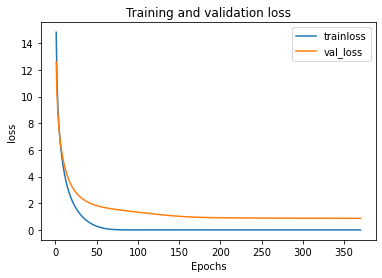

In [19]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    valmetrics = history.history['val_'+ metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, valmetrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train"+metric, 'val_'+metric])
    plt.show()
plot_metric(history, 'loss')

In [20]:
def predict():
    predictions = []
    for image in tqdm(os.listdir('/kaggle/input/nn23-sports-image-classification/Test')):
        path = os.path.join('/kaggle/input/nn23-sports-image-classification/Test', image)
        img_data = cv2.imread(path)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE)).reshape(-1,IMG_SIZE,IMG_SIZE,3)

        idx = 0
        value = 0
        cnt = 0
        p = full_model.predict([np.array(img_data)])[0]
        for j in p:
            if j > value:
                value = j
                idx = cnt
            cnt += 1
        predictions.append([image, idx])
    return predictions

In [21]:
predictions = predict()

100%|██████████| 688/688 [00:15<00:00, 45.31it/s]


In [22]:
labels = pd.DataFrame(predictions, columns=['image_name', 'label'])

In [23]:
labels.to_csv('vgg16_with_weights_370.csv', index=False)

In [24]:
full_model.save('vgg16_with_weights_370.tfl')